In [22]:
import numpy as np
import matplotlib.pyplot as plt
from flask import Flask, render_template, request
import sqlite3 as sql
import pandas as pd
from functools import reduce
from io import BytesIO

In [23]:
conn = sql.connect("database.db")
sqlstring = "SELECT * FROM report"
df = pd.read_sql(sqlstring,conn)

In [24]:
df["time_required"] = pd.to_datetime(df["endtime"]) - pd.to_datetime(df["starttime"])
df["time_required(m)"] = df["time_required"].astype('timedelta64[m]')
df["month"] = df["starttime"].apply(lambda x:x[:7])
df = df[["personnel","month","time_required(m)"]]

In [25]:
start = '2017-03'
end = '2017-06'

In [26]:
df = df[(df["month"]>=start)&(df["month"]<=end)]
df = df.groupby(["month","personnel"]).sum()
df = df.reset_index()

res = []
for month in set(df["month"]):
    tmp = df[df["month"]==month]
    tmp = tmp.drop("month",1)
    tmp = tmp.set_index("personnel").T
    tmp["month"] = month
    res.append(tmp)

dfc = reduce(lambda x,y: pd.concat([x,y]), res)
dfc = dfc.set_index("month")
dfc = dfc.fillna(0)

dfc = dfc.sort_index()

col = dfc.columns.tolist()
rows = dfc.index.tolist()

In [27]:
dfc

,personnel A,personnel B,ryosuke HORIUCHI
month,,,
2017-03,0.0,0.0,44646.0
2017-04,0.0,0.0,60.0
2017-05,0.0,181.0,16088.0
2017-06,0.0,0.0,17292.0


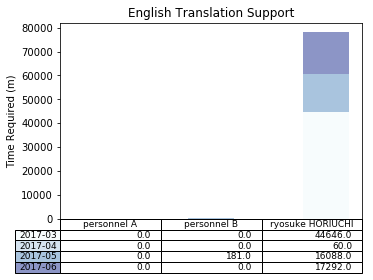

In [28]:
data = dfc
columns = col
rows = rows

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.array([0.0] * len(columns))

plt.figure()

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data.iloc[row,:], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data.iloc[row,:]
    cell_text.append(['%s' % x for x in data.iloc[row,:]])
# Reverse colors and text labels to display the last value at the top.
#colors = colors[::-1]
#cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Time Required (m)")
##plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('English Translation Support')

plt.show()
#image = BytesIO()
#plt.savefig(image, format='png')
#image.seek(0)
#return send_file(image, attachment_filename="image.png", as_attachment=True)




##png_output = StringIO.StringIO()




In [21]:
cell_text

[['0.0', '0.0', '44646.0'],
 ['0.0', '0.0', '60.0'],
 ['0.0', '181.0', '16088.0'],
 ['0.0', '0.0', '17292.0']]